In [1]:
import pandas as pd
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys

inbinfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl'




AUCcutpointfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_AllhyperTrue_Cutpoint.txt'

AUCcutpointTPR_FPRfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_optCutpoint_TPR_FPR.txt'


outfile=inbinfile

AUCcutpoints=pd.read_csv(AUCcutpointfile,sep="\t")

AUCcutpointTPR_FPR=pd.read_csv(AUCcutpointTPR_FPRfile,sep="\t")

HRADcodedMethod='adjustedScore_minus_avg'

####BL22#####
scorecolumns=['NaiveCD4-others','NaiveCD8-others','nB-others','NK-others','PC-others','Mono-others','M0-others','M1-others','M2-others','iDC-others','mDC-others','PMN-others','cm8-others','em8-others','Eo-others','Tregs-others','em4-others','ed8-others','Mg-others','cm4-others','Er-others','mB-others']

inbindf=pd.read_pickle(inbinfile)

inbindf=inbindf.reset_index()
inbindf.head()

index  NaiveCD4-others  \
0   Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447        -0.181992   
1  Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609        -0.078167   
2  Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811        -0.238056   
3  Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298        -0.095000   
4   Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568        -0.048310   

   NaiveCD8-others  nB-others  NK-others  PC-others  Mono-others  M0-others  \
0        -0.146024  -0.188627  -0.131008  -0.087008    -0.121579   0.035913   
1        -0.018802  -0.051278  -0.062452  -0.053722    -0.026135  -0.065595   
2        -0.233865  -0.196849  -0.222341  -0.203135     0.735881   0.502960   
3        -0.117000   0.924333  -0.085222  -0.103381    -0.074397  -0.102333   
4         0.812135  -0.089167   0.288325   0.107437    -0.092659  -0.130722   

   M1-others  M2-others  ...  LENhypoCpG  LENhyperCpG  total_cpg  \
0   0.019849   0.431214  ...         1.0          0.0        1.0   
1  -0.078167  -0.053373  ...         1.0          0.0        1.0   
2   0.526008   0.567563  ...         1.0          0.0        1.0   
3  -0.084175  -0.066365  ...         1.0          0.0        1.0   
4  -0.130722  -0.107675  ...         1.0          0.0        1.0   

   LENhypoCpG_BY_total_cpg  maxscoredCT_beforeCpGweight  \
0                      1.0                   iDC-others   
1                      1.0                   PMN-others   
2                      1.0                  Mono-others   
3                      1.0                    nB-others   
4                      1.0              NaiveCD8-others   

   maxscore_beforeCpGweight      maxscoredCT  maxscore  \
0                  0.769421       iDC-others  0.769421   
1                  0.969452       PMN-others  0.969452   
2                  0.735881      Mono-others  0.735881   
3                  0.924333        nB-others  0.924333   
4                  0.812135  NaiveCD8-others  0.812135   

   deltabasedfragassignment                                           filename  
0                iDC-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
1                PMN-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
2               Mono-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
3                 nB-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
4           NaiveCD8-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  

[5 rows x 33 columns]

In [2]:

allassigned=inbindf.copy()



allassigned.head()

index  NaiveCD4-others  \
0   Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447        -0.181992   
1  Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609        -0.078167   
2  Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811        -0.238056   
3  Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298        -0.095000   
4   Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568        -0.048310   

   NaiveCD8-others  nB-others  NK-others  PC-others  Mono-others  M0-others  \
0        -0.146024  -0.188627  -0.131008  -0.087008    -0.121579   0.035913   
1        -0.018802  -0.051278  -0.062452  -0.053722    -0.026135  -0.065595   
2        -0.233865  -0.196849  -0.222341  -0.203135     0.735881   0.502960   
3        -0.117000   0.924333  -0.085222  -0.103381    -0.074397  -0.102333   
4         0.812135  -0.089167   0.288325   0.107437    -0.092659  -0.130722   

   M1-others  M2-others  ...  LENhypoCpG  LENhyperCpG  total_cpg  \
0   0.019849   0.431214  ...         1.0          0.0        1.0   
1  -0.078167  -0.053373  ...         1.0          0.0        1.0   
2   0.526008   0.567563  ...         1.0          0.0        1.0   
3  -0.084175  -0.066365  ...         1.0          0.0        1.0   
4  -0.130722  -0.107675  ...         1.0          0.0        1.0   

   LENhypoCpG_BY_total_cpg  maxscoredCT_beforeCpGweight  \
0                      1.0                   iDC-others   
1                      1.0                   PMN-others   
2                      1.0                  Mono-others   
3                      1.0                    nB-others   
4                      1.0              NaiveCD8-others   

   maxscore_beforeCpGweight      maxscoredCT  maxscore  \
0                  0.769421       iDC-others  0.769421   
1                  0.969452       PMN-others  0.969452   
2                  0.735881      Mono-others  0.735881   
3                  0.924333        nB-others  0.924333   
4                  0.812135  NaiveCD8-others  0.812135   

   deltabasedfragassignment                                           filename  
0                iDC-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
1                PMN-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
2               Mono-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
3                 nB-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  
4           NaiveCD8-others  BL22test_NR_3215798_insilmix6_sorted_binnedsta...  

[5 rows x 33 columns]

In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

index  NaiveCD4-others  \
0   Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447        -0.181992   
1  Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609        -0.078167   
2  Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811        -0.238056   
3  Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298        -0.095000   
4   Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568        -0.048310   

   NaiveCD8-others  nB-others  NK-others  PC-others  Mono-others  M0-others  \
0        -0.146024  -0.188627  -0.131008  -0.087008    -0.121579   0.035913   
1        -0.018802  -0.051278  -0.062452  -0.053722    -0.026135  -0.065595   
2        -0.233865  -0.196849  -0.222341  -0.203135     0.735881   0.502960   
3        -0.117000   0.924333  -0.085222  -0.103381    -0.074397  -0.102333   
4         0.812135  -0.089167   0.288325   0.107437    -0.092659  -0.130722   

   M1-others  M2-others  ...  total_cpg  LENhypoCpG_BY_total_cpg  \
0   0.019849   0.431214  ...        1.0                      1.0   
1  -0.078167  -0.053373  ...        1.0                      1.0   
2   0.526008   0.567563  ...        1.0                      1.0   
3  -0.084175  -0.066365  ...        1.0                      1.0   
4  -0.130722  -0.107675  ...        1.0                      1.0   

   maxscoredCT_beforeCpGweight  maxscore_beforeCpGweight      maxscoredCT  \
0                   iDC-others                  0.769421       iDC-others   
1                   PMN-others                  0.969452       PMN-others   
2                  Mono-others                  0.735881      Mono-others   
3                    nB-others                  0.924333        nB-others   
4              NaiveCD8-others                  0.812135  NaiveCD8-others   

   maxscore  deltabasedfragassignment  \
0  0.769421                iDC-others   
1  0.969452                PMN-others   
2  0.735881               Mono-others   
3  0.924333                 nB-others   
4  0.812135           NaiveCD8-others   

                                            filename  secondmaxScore  \
0  BL22test_NR_3215798_insilmix6_sorted_binnedsta...     Notassigned   
1  BL22test_NR_3215798_insilmix6_sorted_binnedsta...     Notassigned   
2  BL22test_NR_3215798_insilmix6_sorted_binnedsta...     Notassigned   
3  BL22test_NR_3215798_insilmix6_sorted_binnedsta...     Notassigned   
4  BL22test_NR_3215798_insilmix6_sorted_binnedsta...     Notassigned   

   secondmaxScoreCT  
0       Notassigned  
1       Notassigned  
2       Notassigned  
3       Notassigned  
4       Notassigned  

[5 rows x 35 columns]

In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

index  NaiveCD4-others  \
0   Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447        -0.181992   
1  Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609        -0.078167   
2  Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811        -0.238056   
3  Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298        -0.095000   
4   Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568        -0.048310   

   NaiveCD8-others  nB-others  NK-others  PC-others  Mono-others  M0-others  \
0        -0.146024  -0.188627  -0.131008  -0.087008    -0.121579   0.035913   
1        -0.018802  -0.051278  -0.062452  -0.053722    -0.026135  -0.065595   
2        -0.233865  -0.196849  -0.222341  -0.203135     0.735881   0.502960   
3        -0.117000   0.924333  -0.085222  -0.103381    -0.074397  -0.102333   
4         0.812135  -0.089167   0.288325   0.107437    -0.092659  -0.130722   

   M1-others  M2-others  ...  maxscoredCT_beforeCpGweight  \
0   0.019849   0.431214  ...                   iDC-others   
1  -0.078167  -0.053373  ...                   PMN-others   
2   0.526008   0.567563  ...                  Mono-others   
3  -0.084175  -0.066365  ...                    nB-others   
4  -0.130722  -0.107675  ...              NaiveCD8-others   

   maxscore_beforeCpGweight      maxscoredCT  maxscore  \
0                  0.769421       iDC-others  0.769421   
1                  0.969452       PMN-others  0.969452   
2                  0.735881      Mono-others  0.735881   
3                  0.924333        nB-others  0.924333   
4                  0.812135  NaiveCD8-others  0.812135   

   deltabasedfragassignment  \
0                iDC-others   
1                PMN-others   
2               Mono-others   
3                 nB-others   
4           NaiveCD8-others   

                                            filename  secondmaxScore  \
0  BL22test_NR_3215798_insilmix6_sorted_binnedsta...        0.724373   
1  BL22test_NR_3215798_insilmix6_sorted_binnedsta...       0.0360238   
2  BL22test_NR_3215798_insilmix6_sorted_binnedsta...        0.567563   
3  BL22test_NR_3215798_insilmix6_sorted_binnedsta...        0.842619   
4  BL22test_NR_3215798_insilmix6_sorted_binnedsta...        0.288325   

   secondmaxScoreCT  adjustedScore_minus  adjustedScore_minus_avg  
0        mDC-others            0.0450476                 0.407234  
1         Eo-others             0.933429                  0.95144  
2         M2-others             0.168317                 0.452099  
3         mB-others            0.0817143                 0.503024  
4         NK-others              0.52381                 0.667972  

[5 rows x 37 columns]

In [7]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [8]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [9]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [10]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [11]:
AUCcutpoints.head()

Celltype  adjustedScore_minus_avg
0       Eo                 0.711631
1       Er                 0.644778
2       M0                 0.371504
3       M1                 0.380202
4       M2                 0.401667

In [12]:
AUCcutpointTPR_FPR.head()


celltype       TPR       FPR
0       Eo  1.000000  0.040657
1       Er  0.977941  0.037611
2       M0  0.911765  0.179619
3       M1  0.850000  0.140075
4       M2  0.940828  0.147554

In [13]:

def calposscore(fgrouped,whichmethod,fname):
    ctposscoredict= defaultdict(list)  ##### actually pos  count of fragment
    
    cttoalfrag=defaultdict(list)
    
    
    cttheoriticalproportion=defaultdict(list)
    cttheoriticalFDR=defaultdict(list)
    
    
    
    ctREALFDR=defaultdict(list)
    ctREALTPR=defaultdict(list)
    ctREALFPR=defaultdict(list)
    
    
    ctAUC=defaultdict(list)
    ctAUCcut=defaultdict(list)
    
    

    
    
   
    for score in scorecolumns:
        ctname=score.replace('-others','')
        
        

        totafragforthisfileforthisct=fgrouped[fgrouped['deltabasedfragassignment']==score].shape[0]
        

        
        cttoalfrag[ctname].append(totafragforthisfileforthisct)
        
        tempAUCcut=((AUCcutpoints[AUCcutpoints['Celltype']==ctname][whichmethod]).tolist())[0]

        
        fgroupedAUC=fgrouped[fgrouped[whichmethod]>=tempAUCcut] #####
        

        
        deltabasedfragassigned=fgroupedAUC['deltabasedfragassignment'].tolist()
        if score in deltabasedfragassigned:
            temp_posscore=fgroupedAUC.loc[fgroupedAUC['deltabasedfragassignment']==score,whichmethod].tolist()
            temptotal_posscore=sum(temp_posscore)
            temp_posfrag=len(temp_posscore)

        else:
            temptotal_posscore=0
            temp_posfrag=0

        

        ctposscoredict[ctname].append(temp_posfrag)
        
        
        
        forAUCgroupd=fgrouped[fgrouped['deltabasedfragassignment']==score]
        
        y=(forAUCgroupd['index'].str.contains(ctname)).astype(int) 
        
        pred=(forAUCgroupd[whichmethod]).to_numpy()
        
        ####
        '''
        if ctname=='em4':
            ctinfodf=pd.DataFrame(data={ctname:y,'score':pred})
            ctinfodf.to_csv(outfile+"_"+ctname+"_"+fname+".txt",sep='\t',index=False)
        '''
        ####
        




        fpr, tpr, thresholds=metrics.roc_curve(y,pred,pos_label=1)


        tempAUC=metrics.auc(fpr, tpr)
        
        ctAUC[ctname].append(tempAUC)
        
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        ctAUCcut[ctname].append(optimal_threshold)
        
        
        ####theoritical result####
        truepos=sum(y)
        truneg=len(y)-truepos
        tpr=((AUCcutpointTPR_FPR[AUCcutpointTPR_FPR['celltype']==ctname]['TPR']).tolist())[0]
        fpr=((AUCcutpointTPR_FPR[AUCcutpointTPR_FPR['celltype']==ctname]['FPR']).tolist())[0]
        
        expectedTP=truepos*tpr
        expectedTN=truneg*fpr  ###this is expected FP
        
        if (truepos+truneg)!=totafragforthisfileforthisct:
            print('wrong.EXIT')
            sys.exit(1)
            
        theoriticalproportion=(expectedTP+expectedTN)/totafragforthisfileforthisct
        
        theoriticalFDR=expectedTN/(expectedTN+expectedTP)
        
        cttheoriticalFDR[ctname].append(theoriticalFDR)
        
        cttheoriticalproportion[ctname].append(theoriticalproportion)
        
        
        
        ###real TPR,FPR,FDR####
        
        forrealanalysis=fgroupedAUC[fgroupedAUC['deltabasedfragassignment']==score]
        
        yFORreal=(forrealanalysis['index'].str.contains(ctname)).astype(int) 
        
   
        RealTP=sum(yFORreal)
        RealFP=temp_posfrag-RealTP
        
        if temp_posfrag!=forrealanalysis.shape[0]:
            print('error in real analysis')
            sys.exit(1)
        
    
        
        RealFDR=RealFP/temp_posfrag
        ctREALFDR[ctname].append(RealFDR)
        
        
        
    
        
    
    
 
    ctREALFDRdf=pd.DataFrame.from_dict(ctREALFDR)
    ctREALFDRdf['Mixture']=fname
    
    
    cttheoriticalproportiondf=pd.DataFrame.from_dict(cttheoriticalproportion)
    cttheoriticalproportiondf['Mixture']=fname
    
    cttheoriticalFDRdf=pd.DataFrame.from_dict(cttheoriticalFDR)
    cttheoriticalFDRdf['Mixture']=fname
       
    ctposscoredf=pd.DataFrame.from_dict(ctposscoredict)
    ctposscoredf['Mixture']=fname
    
    cttoalfragdf=pd.DataFrame.from_dict(cttoalfrag)
    cttoalfragdf['Mixture']=fname
    
    ctAUCdf=pd.DataFrame.from_dict(ctAUC)
    ctAUCcut=pd.DataFrame.from_dict(ctAUCcut)
    
    ctAUCdf['Mixture']=fname
    ctAUCcut['Mixture']=fname
    
    
    return ctposscoredf, cttoalfragdf,ctAUCdf,ctAUCcut,cttheoriticalproportiondf,cttheoriticalFDRdf,ctREALFDRdf

In [14]:
filegrouped=allassigned.groupby('filename')
adjustedScore_minus_avg_ctposfrag=[]
adjustedScore_minus_avg_cttotalfrag=[]




theoriticalresult=[]

theoriticalFDR=[]

filespecificAUC=[]
filespecificAUCcut=[]



realFDRlist=[]

for name, group in filegrouped:
    
   
    r1,r2,r3,r4,r5,r6,r7=calposscore(group,HRADcodedMethod,name)
    
    adjustedScore_minus_avg_ctposfrag.append(r1)
    adjustedScore_minus_avg_cttotalfrag.append(r2)
    
    
    filespecificAUC.append(r3)
    filespecificAUCcut.append(r4)
    
    theoriticalresult.append(r5)
    
    theoriticalFDR.append(r6)
    
    realFDRlist.append(r7)
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

In [15]:
adjustedScore_minus_avctposfragDF=pd.concat(adjustedScore_minus_avg_ctposfrag)
adjustedScore_minus_avctposfragDF.set_index('Mixture',inplace=True)

adjustedScore_minus_avg_cttotalfragDF=pd.concat(adjustedScore_minus_avg_cttotalfrag)
adjustedScore_minus_avg_cttotalfragDF.set_index('Mixture',inplace=True)

filespecificAUCDF=pd.concat(filespecificAUC)
filespecificAUCDF.set_index('Mixture',inplace=True)

filespecificAUCcutDF=pd.concat(filespecificAUCcut)
filespecificAUCcutDF.set_index('Mixture',inplace=True)




In [16]:
adjustedScore_minus_avctposfragDF.head()

NaiveCD4  NaiveCD8  nB  \
Mixture                                                                      
BL22test_NR_3215798_insilmix10_sorted_binnedsta...        99        15  10   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...        55        10  23   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...        81         9  20   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...        91        15  15   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...       104        15  13   

                                                    NK  PC  Mono   M0  M1  \
Mixture                                                                     
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  30   4    67  135  27   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  53   4    79  136  28   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  30  10    68  165  32   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  49   3    47   92  22   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  56   7    58  137  26   

                                                     M2  iDC  ...  cm8  em8  \
Mixture                                                       ...             
BL22test_NR_3215798_insilmix10_sorted_binnedsta...   95   53  ...   17   13   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...   96   57  ...   23   20   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  105   62  ...   15   17   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...   78   50  ...   28   19   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...   81   39  ...   27   15   

                                                    Eo  Tregs  em4  ed8  Mg  \
Mixture                                                                       
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  12      9    1    4  11   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  12      7    1    3   6   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  19      5    1    2  10   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...   5     13    1    5   9   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...   9      9    1    4  10   

                                                    cm4  Er  mB  
Mixture                                                          
BL22test_NR_3215798_insilmix10_sorted_binnedsta...   15  22   3  
BL22test_NR_3215798_insilmix1_sorted_binnedstat...   10  11   4  
BL22test_NR_3215798_insilmix2_sorted_binnedstat...   10  13   8  
BL22test_NR_3215798_insilmix3_sorted_binnedstat...   15  17   8  
BL22test_NR_3215798_insilmix4_sorted_binnedstat...   15  17   3  

[5 rows x 22 columns]

In [17]:
adjustedScore_minus_avg_cttotalfragDF.head()

NaiveCD4  NaiveCD8   nB  \
Mixture                                                                       
BL22test_NR_3215798_insilmix10_sorted_binnedsta...       544       122  130   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...       512       120  120   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...       517       122  117   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...       508       114  125   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...       513       114  116   

                                                     NK   PC  Mono   M0   M1  \
Mixture                                                                        
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  508  108   252  580  136   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  490  105   263  571  140   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  486  117   251  591  138   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  479  109   245  583  142   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  499  104   253  597  131   

                                                     M2  iDC  ...  cm8  em8  \
Mixture                                                       ...             
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  538  254  ...   99   56   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  526  249  ...   98   59   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  518  253  ...   94   56   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  535  270  ...  105   58   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  497  243  ...  102   49   

                                                     Eo  Tregs  em4  ed8   Mg  \
Mixture                                                                         
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  123     75   38   38  161   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  126     73   36   41  142   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  126     73   42   40  143   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  125     75   43   41  156   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  109     74   46   50  151   

                                                    cm4   Er  mB  
Mixture                                                           
BL22test_NR_3215798_insilmix10_sorted_binnedsta...   53  270  76  
BL22test_NR_3215798_insilmix1_sorted_binnedstat...   54  290  66  
BL22test_NR_3215798_insilmix2_sorted_binnedstat...   57  279  80  
BL22test_NR_3215798_insilmix3_sorted_binnedstat...   60  257  73  
BL22test_NR_3215798_insilmix4_sorted_binnedstat...   53  262  75  

[5 rows x 22 columns]

In [18]:
cellfractions=adjustedScore_minus_avctposfragDF/adjustedScore_minus_avg_cttotalfragDF
cellfractions.head()

NaiveCD4  NaiveCD8  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.181985  0.122951   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.107422  0.083333   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.156673  0.073770   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.179134  0.131579   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.202729  0.131579   

                                                          nB        NK  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.076923  0.059055   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.191667  0.108163   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.170940  0.061728   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.120000  0.102296   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.112069  0.112224   

                                                          PC      Mono  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.037037  0.265873   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.038095  0.300380   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.085470  0.270916   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.027523  0.191837   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.067308  0.229249   

                                                          M0        M1  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.232759  0.198529   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.238179  0.200000   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.279188  0.231884   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.157804  0.154930   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.229481  0.198473   

                                                          M2       iDC  ...  \
Mixture                                                                 ...   
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.176580  0.208661  ...   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.182510  0.228916  ...   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.202703  0.245059  ...   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.145794  0.185185  ...   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.162978  0.160494  ...   

                                                         cm8       em8  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.171717  0.232143   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.234694  0.338983   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.159574  0.303571   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.266667  0.327586   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.264706  0.306122   

                                                          Eo     Tregs  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.097561  0.120000   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.095238  0.095890   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.150794  0.068493   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.040000  0.173333   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.082569  0.121622   

                                                         em4       ed8  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.026316  0.105263   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.027778  0.073171   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.023810  0.050000   
BL22test_NR_32

In [19]:
adjustedScore_minus_avctposfragDF.to_csv(outfile+"_est_ctposfrag.txt",sep="\t")
adjustedScore_minus_avg_cttotalfragDF.to_csv(outfile+"_est_cttotalfrag.txt",sep="\t")
cellfractions.to_csv(outfile+"_cellularfractions.txt",sep="\t")

In [20]:
filespecificAUCDF.to_csv(outfile+"_fileAUC.txt",sep="\t")

filespecificAUCcutDF.to_csv(outfile+"_fileAUCcut.txt",sep="\t")

In [21]:
theoriticalresultdf=pd.concat(theoriticalresult)
theoriticalresultdf.set_index('Mixture',inplace=True)
theoriticalresultdf.head()

NaiveCD4  NaiveCD8  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.175895  0.107213   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.146481  0.093375   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.156797  0.121167   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.156980  0.116149   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.164965  0.123615   

                                                          nB        NK  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.093715  0.071236   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.200854  0.116004   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.188169  0.073429   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.108609  0.094432   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.110310  0.098679   

                                                          PC      Mono  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.033825  0.251789   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.040649  0.280058   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.067666  0.229790   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.039937  0.217422   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.053888  0.248457   

                                                          M0        M1  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.225062  0.150515   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.238601  0.150217   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.235366  0.196663   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.179619  0.185070   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.220089  0.194268   

                                                          M2       iDC  ...  \
Mixture                                                                 ...   
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.181467  0.215964  ...   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.165651  0.177874  ...   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.168994  0.177539  ...   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.154968  0.220813  ...   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.177880  0.175300  ...   

                                                         cm8       em8  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.233149  0.263281   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.233229  0.353516   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.225324  0.360584   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.225324  0.315527   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.240514  0.253352   

                                                          Eo     Tregs  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.095254  0.136167   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.086340  0.112500   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.162479  0.112500   
BL22test_NR_3215798_insilmix3_sorted_binnedstat...  0.048332  0.171667   
BL22test_NR_3215798_insilmix4_sorted_binnedstat...  0.067061  0.124493   

                                                         em4       ed8  \
Mixture                                                                  
BL22test_NR_3215798_insilmix10_sorted_binnedsta...  0.026316  0.077239   
BL22test_NR_3215798_insilmix1_sorted_binnedstat...  0.027778  0.073487   
BL22test_NR_3215798_insilmix2_sorted_binnedstat...  0.023810  0.025974   
BL22test_NR_32

In [22]:
theoriticalresultdf.to_csv(outfile+"_theoritical_proportion.txt",sep="\t")

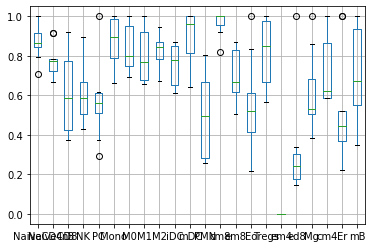

In [23]:

theoriticalFDRdf=pd.concat(theoriticalFDR)
theoriticalFDRdf.set_index('Mixture',inplace=True)
theoriticalFDRdf.boxplot()

[Text(0, 0, 'NaiveCD4'),
 Text(0, 0, 'NaiveCD8'),
 Text(0, 0, 'nB'),
 Text(0, 0, 'NK'),
 Text(0, 0, 'PC'),
 Text(0, 0, 'Mono'),
 Text(0, 0, 'M0'),
 Text(0, 0, 'M1'),
 Text(0, 0, 'M2'),
 Text(0, 0, 'iDC'),
 Text(0, 0, 'mDC'),
 Text(0, 0, 'PMN'),
 Text(0, 0, 'cm8'),
 Text(0, 0, 'em8'),
 Text(0, 0, 'Eo'),
 Text(0, 0, 'Tregs'),
 Text(0, 0, 'em4'),
 Text(0, 0, 'ed8'),
 Text(0, 0, 'Mg'),
 Text(0, 0, 'cm4'),
 Text(0, 0, 'Er'),
 Text(0, 0, 'mB')]

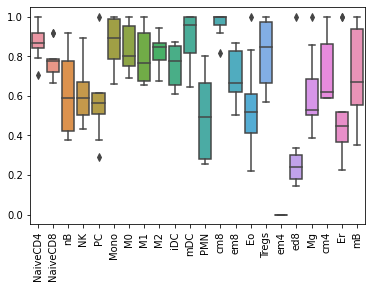

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.boxplot(data=theoriticalFDRdf)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'NaiveCD4'),
 Text(0, 0, 'NaiveCD8'),
 Text(0, 0, 'nB'),
 Text(0, 0, 'NK'),
 Text(0, 0, 'PC'),
 Text(0, 0, 'Mono'),
 Text(0, 0, 'M0'),
 Text(0, 0, 'M1'),
 Text(0, 0, 'M2'),
 Text(0, 0, 'iDC'),
 Text(0, 0, 'mDC'),
 Text(0, 0, 'PMN'),
 Text(0, 0, 'cm8'),
 Text(0, 0, 'em8'),
 Text(0, 0, 'Eo'),
 Text(0, 0, 'Tregs'),
 Text(0, 0, 'em4'),
 Text(0, 0, 'ed8'),
 Text(0, 0, 'Mg'),
 Text(0, 0, 'cm4'),
 Text(0, 0, 'Er'),
 Text(0, 0, 'mB')]

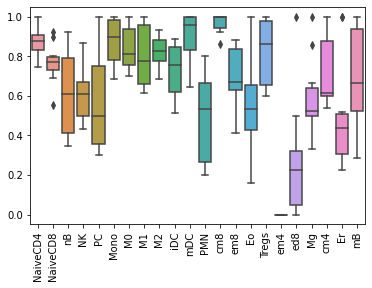

In [25]:
realFDRlistDF=pd.concat(realFDRlist)
realFDRlistDF.set_index('Mixture',inplace=True)
#realFDRlistDF
ax=sns.boxplot(data=realFDRlistDF)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [26]:
theoriticalFDRdf.to_csv(outfile+"_theoriticalFDR.txt",sep="\t")

In [27]:
realFDRlistDF.to_csv(outfile+"_realFDR.txt",sep="\t")